#VGG 16

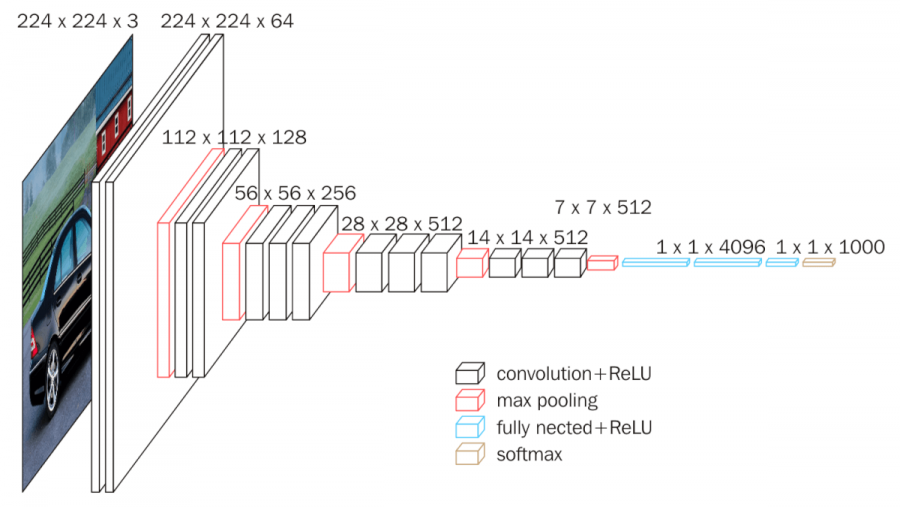

In [ ]:
import torchvision.models as models

model = models.vgg16(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
from torchsummary import summary 

summary(model, input_size = (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

## Normalization

In [ ]:
from torchvision import datasets, transforms, models

data_dir = '/images'

test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      #transforms.Normalize([0.485, 0.456, 0.406],
                                      #                     [0.229, 0.224, 0.225])
                                     ])

net.eval() is a kind of switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. 

In [ ]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Get the imageNet Class label names
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/imageNetclasses.json

--2022-12-12 14:57:10--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/imageNetclasses.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33567 (33K) [text/plain]
Saving to: ‘imageNetclasses.json’

imageNetclasses.jso 100%[===================>]  32.78K  --.-KB/s    in 0.003s  

2022-12-12 14:57:10 (12.8 MB/s) - ‘imageNetclasses.json’ saved [33567/33567]



In [ ]:
import torch
import json
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open('imageNetclasses.json') as f:
  class_names = json.load(f)


def predict_image(images, class_names):
    to_pil = transforms.ToPILImage()
    fig=plt.figure(figsize=(16,16))

    for (i,image) in enumerate(images):
      # Convert to image and tensor
      image = to_pil(image)
      image_tensor = test_transforms(image).float()
      image_tensor = image_tensor.unsqueeze_(0)
      input = Variable(image_tensor)
      input = input.to(device)
      output = model(input)
      index = output.data.cpu().numpy().argmax()
      name = class_names[str(index)]
      
      # Plot image
      sub = fig.add_subplot(len(images),1, i+1)
      sub.set_title(f'Predicted {str(name)}')
      plt.axis('off')
      plt.imshow(image)
    plt.show()

def get_images(directory='./images'):
    data = datasets.ImageFolder(directory, transform=test_transforms)
    num_images = len(data)
    loader = torch.utils.data.DataLoader(data, batch_size=num_images)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
!unzip imagesDLCV.zip

--2022-12-12 15:23:09--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.174
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457845 (1.4M) [application/zip]
Saving to: ‘imagesDLCV.zip’

imagesDLCV.zip      100%[===================>]   1.39M  2.57MB/s    in 0.5s    

2022-12-12 15:23:10 (2.57 MB/s) - ‘imagesDLCV.zip’ saved [1457845/1457845]

Archive:  imagesDLCV.zip
   creating: images/
  inflating: images/.DS_Store        
   creating: images/class1/
  inflating: images/class1/.DS_Store  
  inflating: images/class1/1539714414867.jpg  
  inflating: images/class1/81z6x3SZEpL._AC_SL1500_.jpg  
  inflating: images/class1/Basketball_(Ball).jpg  
  inflating: images/class1/German_Shepherd_-_DSC_0346_

In [ ]:
images = get_images('./images')
predict_image(images, class_names)

AttributeError: ignored

#Resnet

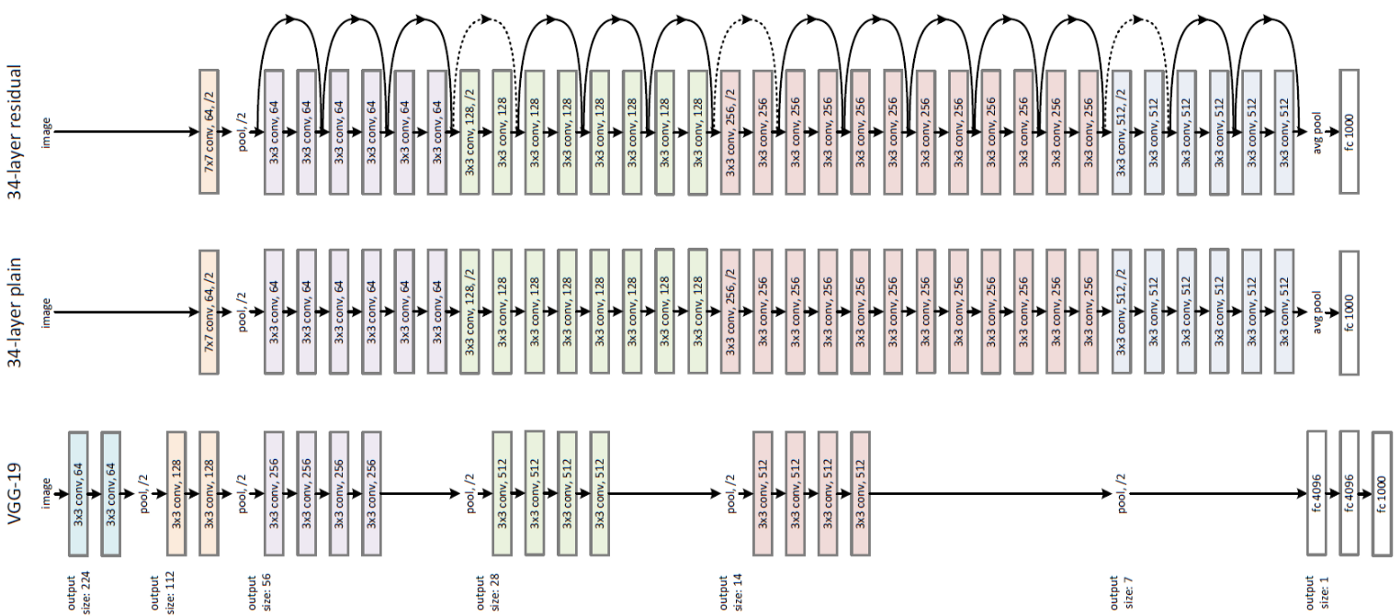

In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained=True)

In [ ]:
summary(model, input_size = (3,224,224))

In [ ]:
model.eval()

In [ ]:
images = get_images('./images')
predict_image(images, class_names)

# Inception V3

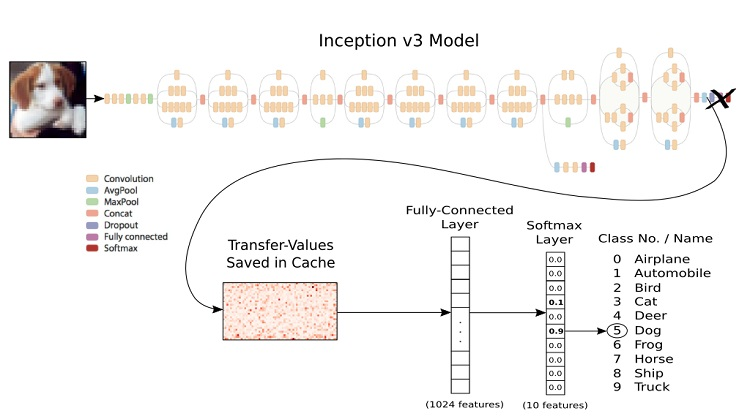

In [ ]:
import torchvision.models as models

model = models.inception_v3(pretrained=True)
# Show Model Parameters
from torchsummary import summary 

# Note difference input sinze is expected with Inception
summary(model, input_size = (3,299,299))

In [ ]:
# Set to Eval and look at the model's layers
model.eval()

In [ ]:
images = get_images('./images')
predict_image(images, class_names)

# Mobilenet

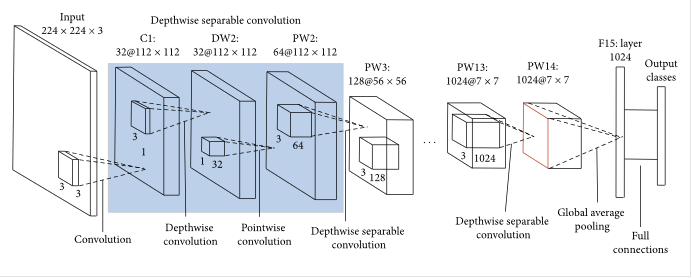

In [ ]:
# Show Model Parameters
from torchsummary import summary 

summary(model, input_size = (3,224,224))

In [ ]:
# Set to Eval and look at the model's layers
model.eval()

In [ ]:
images = get_images('./images')
predict_image(images, class_names)

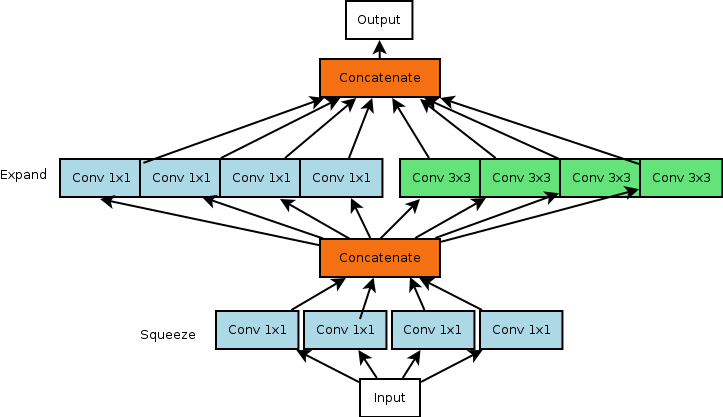

In [ ]:
model = models.squeezenet1_0(pretrained=True)
summary(model, input_size = (3,224,224))

In [ ]:
# Set to Eval and look at the model's layers
model.eval()

In [ ]:
images = get_images('./images')
predict_image(images, class_names)

# Wide Resnet

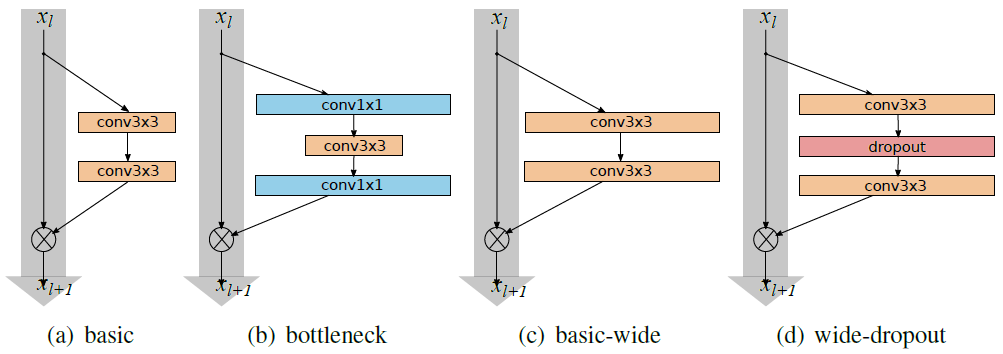

In [ ]:
model = models.wide_resnet50_2(pretrained=True)
summary(model, input_size = (3,224,224))

In [ ]:
# Set to Eval and look at the model's layers
model.eval()

In [ ]:
images = get_images('./images')
predict_image(images, class_names)

# MNASNet

In [ ]:
model = models.mnasnet1_0(pretrained=True)
summary(model, input_size = (3,224,224))


In [ ]:
# Set to Eval and look at the model's layers
model.eval()

In [ ]:
images = get_images('./images')
predict_image(images, class_names)